In [74]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import requests
from pathlib import Path

# Libraries to help with data visualization
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [75]:
# Study data files
google_query_path = "data/Google_Bigquery_Top_Search_Jan_Jun_2024.csv"

google_query_data = pd.read_csv(google_query_path)

# Read the CSV into a Pandas DataFrame
google_queryDF = pd.DataFrame(google_query_data)
# Convert 'week' column to datetime format
google_queryDF['week'] = pd.to_datetime(google_queryDF['week'])

# Create a dictionary to associate Teams with Terms
team_terms = {
    'Boston Celtics': ['Celtics'],
    'Dallas Mavericks': ['Mavericks'],
    'Denver Nuggets': ['Aaron Gordon', 'Nikola Jokic', 'Nuggets vs Timberwolves'],
    'Minnesota Timberwolves': ['Mike Conley', 'Nuggets vs Timberwolves', 'Naz reid'],
    'New York Knicks': ['Knicks', 'Donte DiVincenzo']
}

# Filter seach dataset of 'Terms' based on the 'Teams' using list comprehension:
# Create an empty list to store the filtered DataFrames with the 'Team' value
filtered_dfs = []

# # Iterate through each team in team_terms and filter the DataFrame based on each team's terms
for team, terms in team_terms.items():
    filtered_df = google_queryDF[google_queryDF['term'].apply(lambda x: x in terms)].copy()
    filtered_df['Team'] = team  # Add the 'Team' value to the filtered DataFrame
    filtered_dfs.append(filtered_df)

# Concatenate all filtered DataFrames into a single DataFrame
filtered_combined_df = pd.concat(filtered_dfs)

print(filtered_combined_df["week"].nunique())
print(filtered_combined_df["week"].value_counts())



19
week
2024-02-25    1419
2024-03-31    1407
2024-02-18    1404
2024-04-21    1402
2024-04-28    1395
2024-04-14    1392
2024-03-24    1385
2024-03-03    1377
2024-01-21    1376
2024-03-17    1372
2024-02-11    1372
2024-04-07    1372
2024-01-07    1364
2024-03-10    1360
2024-05-05    1358
2024-01-14    1342
2024-01-28    1333
2024-02-04    1316
2024-05-12     757
Name: count, dtype: int64


In [102]:
#Output the file containing the search terms filtered by NBA teams

import csv

# Define the output file path
output_file = "data/terms_by_teams.csv"

# Define the header for the CSV file
header = ["Team", "Week", "Term","Rank","dma_name","dma_id","score","refresh_date"]

# Open the output file and write the header
with open(output_file, "w", newline='') as datafile:
    writer = csv.writer(datafile)
    writer.writerow(header)

    # Iterate through the rows of the DataFrame and write each row to the CSV file
    for index, row in filtered_combined_df.iterrows():
        Team = row["Team"]
        Week = row["week"]
        term = row["term"]
        rank = row["rank"]
        dma_name = row["dma_name"]
        dma_id = row["dma_id"]
        score = row["score"]
        refresh_date = row["refresh_date"]
        data_row = [Team, Week, term, rank, dma_name, dma_id,score,refresh_date]
        writer.writerow(data_row)


In [105]:
# Read in the file containing data on searches and team records
NBA_2024_searches = "data/terms_by_teams.csv"
NBA_2024_records = "../ucb-data-analytics-project1-group5/data/teams_playoffs.csv"
NBA_query_data = pd.read_csv(NBA_2024_searches)
NBA_records_data = pd.read_csv(NBA_2024_records)

# Read the CSV files into a Pandas DataFrames
NBA_queryDF = pd.DataFrame(NBA_query_data)
NBA_recordsDF = pd.DataFrame(NBA_records_data)

#Merge the two DataFrames NBA_queryDF and NBA_recordsDF on the fields "Team" and "Week"
NBA_analysis_df = pd.merge(NBA_queryDF, NBA_recordsDF, on=['Team', 'Week'])

# Display the data table for preview
NBA_analysis_df

,Team,Week,Term,Rank,dma_name,dma_id,score,refresh_date,PW_win_pct,Weekly_win_pct,Cum_win_pct,Round
0,Boston Celtics,2024-01-14 00:00:00,Celtics,24,Portland-Auburn ME,500,26.0,2024-05-11,0.667,0.50,0.769,NaN
1,Boston Celtics,2024-01-21 00:00:00,Celtics,24,Portland-Auburn ME,500,25.0,2024-05-11,0.500,0.75,0.767,NaN
2,Boston Celtics,2024-02-25 00:00:00,Celtics,24,Portland-Auburn ME,500,23.0,2024-05-11,1.000,1.00,0.789,NaN
3,Boston Celtics,2024-03-03 00:00:00,Celtics,24,Portland-Auburn ME,500,27.0,2024-05-11,1.000,1.00,0.800,NaN
4,Boston Celtics,2024-03-17 00:00:00,Celtics,24,Portland-Auburn ME,500,25.0,2024-05-11,0.333,1.00,0.791,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
25498,New York Knicks,2024-03-17 00:00:00,Knicks,4,Abilene-Sweetwater TX,662,NaN,2024-05-11,0.333,1.00,0.597,NaN
25499,New York Knicks,2024-04-07 00:00:00,Knicks,4,Abilene-Sweetwater TX,662,NaN,2024-05-11,0.500,0.50,0.590,NaN
25500,New York Knicks,2024-04-14 00:00:00,Knicks,4,Abilene-Sweetwater TX,662,NaN,2024-05-11,0.500,1.00,0.610,NaN
25501,New York Knicks,2024-04-21 00:00:00,Knicks,4,Abilene-Sweetwater TX,662,NaN,2024-05-11,NaN,NaN,NaN,1.0


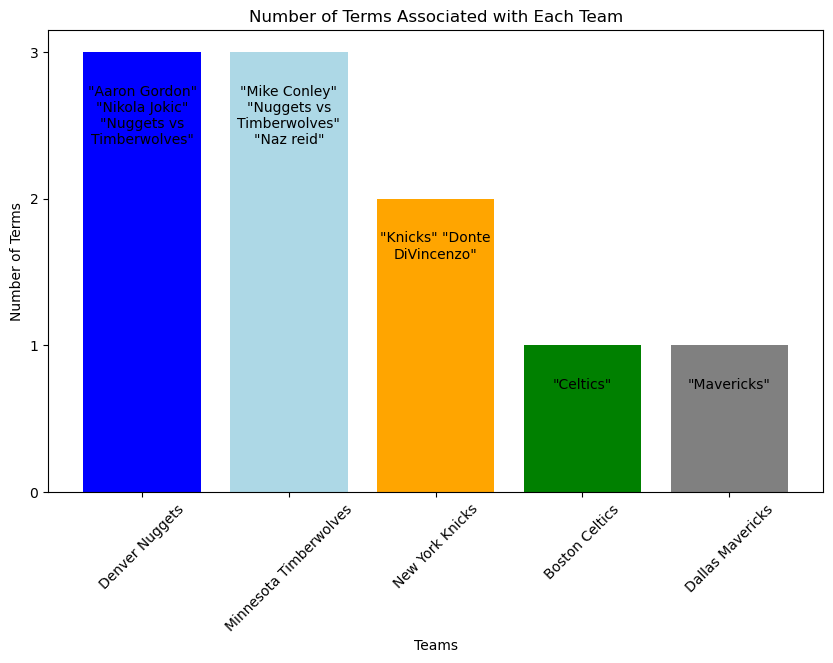

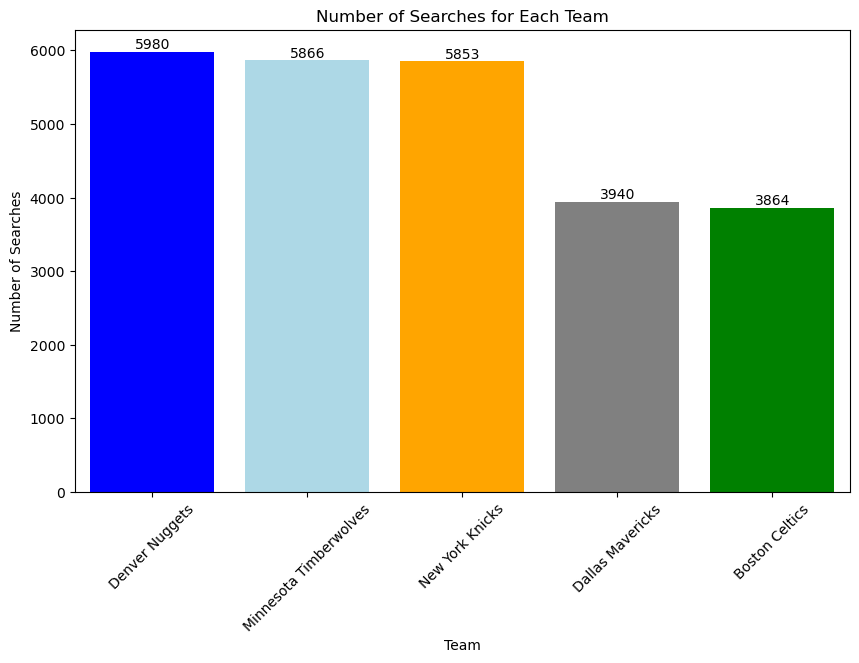

In [106]:
# Perform some simple visualizations of the data

import textwrap
from matplotlib.ticker import MaxNLocator

# Count the number of terms associated with each team
team_counts = {team: len(terms) for team, terms in team_terms.items()}

#Sort the team counts in descending order followed by increasing alphabetical order:
sorted_team_counts = dict(sorted(team_counts.items(), key=lambda x: (-x[1], x[0])))
#Print out a list of terms associated with each team inside the bars in the bar chart:

#Add a different color to each bar in the graph: 

colors = ['blue', 'lightblue', 'orange', 'green', 'gray']  # Add more colors as needed
# Create a bar chart
plt.figure(figsize=(10, 6))
for i, (team, count) in enumerate(sorted_team_counts.items()):
    plt.bar(team, count, color=colors[i % len(colors)])
plt.xlabel('Teams')
plt.ylabel('Number of Terms')
plt.title('Number of Terms Associated with Each Team')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Set y-axis tick labels to display only whole integers with no decimals
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
# Set y-axis tick locator to display only whole number intervals
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

for i, (team, count) in enumerate(sorted_team_counts.items()):
    terms_str = ''.join([f'"{term}"\n' for term in team_terms[team]])

    # Wrap the terms within the label if they exceed a certain number of characters
    wrapped_text = textwrap.fill(terms_str, width=15)  # Adjust the width as needed

#    y_position = i - 0.2  # Adjust the x-coordinate to move the text closer to the left edge
    plt.text(i, count, f"\n\n{wrapped_text}", ha='center', va='top', color='black')
plt.show()


# Count the number of searches for each "Team" in the dataset and plot them in a bar chart
# Count the number of searches for each "Team"
team_counts = NBA_analysis_df['Team'].value_counts()

# Create a bar chart
colors = ['blue', 'lightblue', 'orange', 'gray', 'green']  # Add more colors as needed
# Create a bar chart
plt.figure(figsize=(10, 6))
bar_plot = team_counts.plot(kind='bar')
for i, (team, count) in enumerate(team_counts.items()):
    plt.bar(team, count, color=colors[i % len(colors)])
plt.xlabel('Team')
plt.ylabel('Number of Searches')
plt.title('Number of Searches for Each Team')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# Add count labels to the bars
for i, count in enumerate(team_counts):
    bar_plot.text(i, count, str(count), ha='center', va='bottom', color='black')
plt.show()


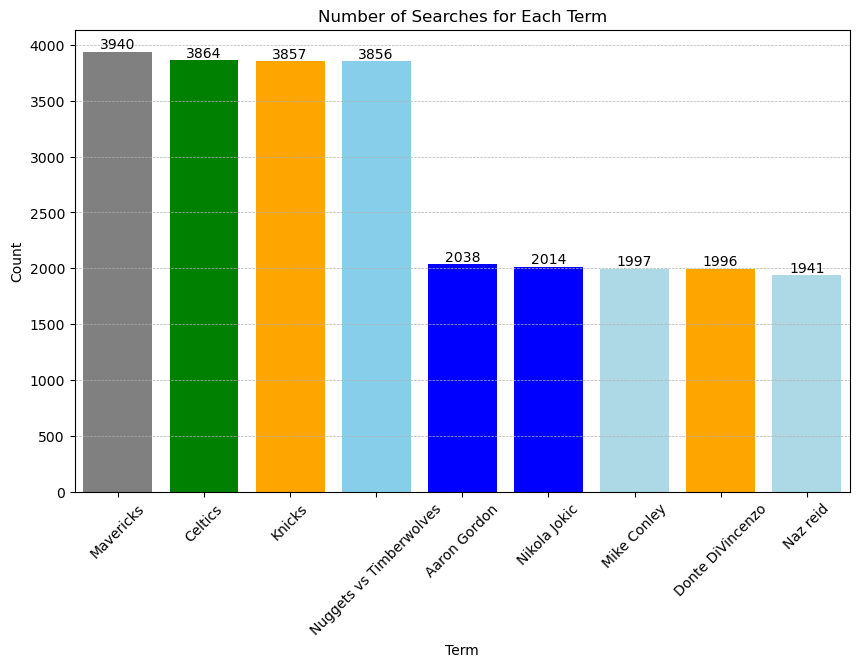

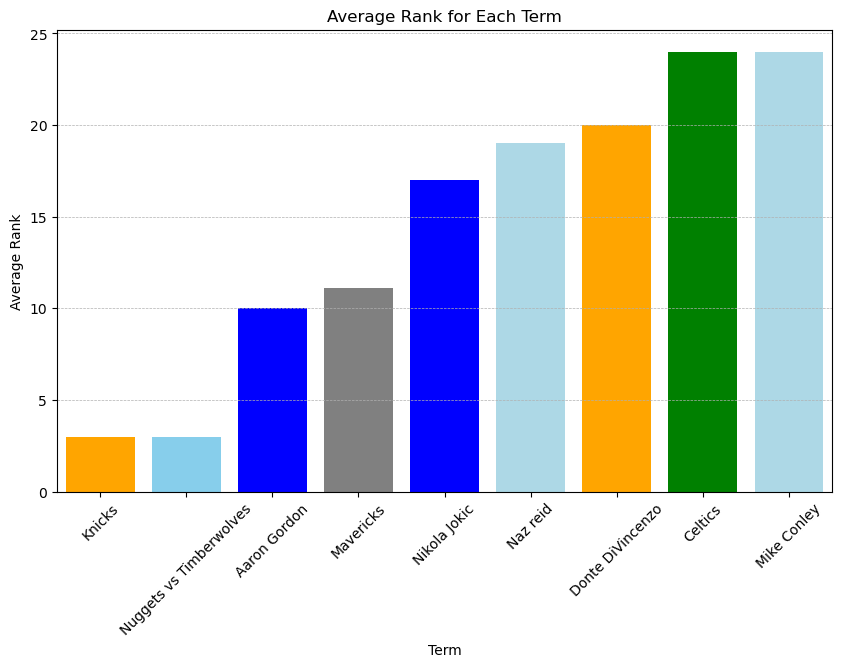

In [122]:
# Plot the NBA search terms, color coded by teams
## Count the occurrences of each unique "Term"
term_counts = NBA_analysis_df['Term'].value_counts()

# set the colors for the bars
colors = ['gray', 'green', 'orange', 'skyblue', 'blue','blue','lightblue','orange','lightblue']  # Add more colors as needed
# Plot the counts in a bar chart
plt.figure(figsize=(10, 6))
bar_plot = term_counts.plot(kind='bar')

# Create a list of hatch patterns for each bar
#hatch_patterns = ['', '', '', 'x','','','','','']  # Add 'x' hatch pattern to the third bar (index 2)

for i, (term, count) in enumerate(term_counts.items()):
    plt.bar(term, count, color=colors[i % len(colors)])
# Set the hatch pattern for each bar based on the hatch_patterns list
#for i, (term, count) in enumerate(term_counts.items()):
#    bar_plot.patches[i].set_hatch(hatch_patterns[i % len(hatch_patterns)])

plt.title('Number of Searches for Each Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Set the hatch pattern for the specific bar
#bars[2].set_hatch('x')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
# Add count labels to the bars
for i, count in enumerate(term_counts):
    bar_plot.text(i, count, str(count), ha='center', va='bottom', color='black')
plt.show()


# Plot the average 'Rank' for each "Term" in the dataset represented below and plot them in a bar chart.
#Group the data by the "Term" column and calculate the average 'Rank' for each group.

avg_rank = NBA_analysis_df.groupby('Term')['Rank'].mean()

# set the colors for the bars
colors = ['orange', 'skyblue', 'blue', 'gray', 'blue','lightblue','orange','green','lightblue']  # Add more colors as needed
# Plot the counts in a bar chart

# Sort the average rank values in ascending order
avg_rank = avg_rank.sort_values()

# Plot the average 'Rank' values in a bar chart
plt.figure(figsize=(10, 6))

avg_rank.plot(kind='bar')

for i, (term, rank) in enumerate(avg_rank.items()):
    plt.bar(term, rank, color=colors[i % len(colors)])

plt.title('Average Rank for Each Term')
plt.xlabel('Term')
plt.ylabel('Average Rank')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()




Team                  0
Week                  0
Term                  0
Rank                  0
dma_name              0
dma_id                0
score             16749
refresh_date          0
PW_win_pct         4912
Weekly_win_pct     4912
Cum_win_pct        4912
Round                 0
dtype: int64
Pearson correlation coefficient between 'Round' and 'Rank': 0.030042335525387952
Pearson correlation coefficient between 'Cum_win_pct' and 'Rank': 0.5009119148764538
Pearson correlation coefficient between 'Weekly_win_pct' and 'Rank': 0.08552172677185926
Pearson correlation coefficient between 'PW_win_pct' and 'Rank': 0.13376166895458505


C:\Users\johns\AppData\Local\Temp\ipykernel_32692\3668454366.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NBA_analysis_df['Rank'].fillna(0, inplace=True)
C:\Users\johns\AppData\Local\Temp\ipykernel_32692\3668454366.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

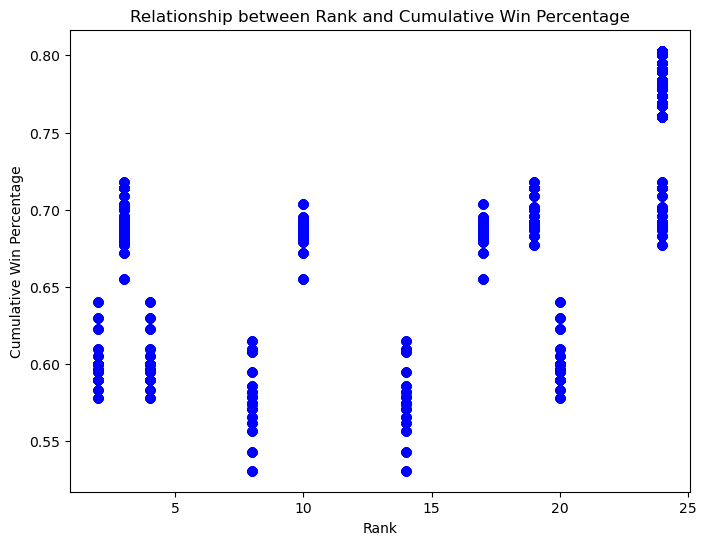

Mean Squared Error: 68.87862860200661
Intercept: 13.123797918115294
Coefficient: 0.6369610143602059
Predicted search rank for playoff round 4 (NBA championship): 15.671641975556117
Mean Squared Error for Boston Celtics: 0.0
Intercept for Boston Celtics: 24.0
Coefficient for Boston Celtics: 0.0
Predicted search rank for Boston Celtics in playoff round 4 (NBA championship): 24.0
Mean Squared Error for Dallas Mavericks: 8.906899777523018
Intercept for Dallas Mavericks: 10.933457742926022
Coefficient for Dallas Mavericks: 0.6604944844886611
Predicted search rank for Dallas Mavericks in playoff round 4 (NBA championship): 13.575435680880666
Mean Squared Error for Denver Nuggets: 32.52274533954302
Intercept for Denver Nuggets: 9.885886666623971
Coefficient for Denver Nuggets: 0.8230930034225655
Predicted search rank for Denver Nuggets in playoff round 4 (NBA championship): 13.178258680314233
Mean Squared Error for Minnesota Timberwolves: 79.66106303574874
Intercept for Minnesota Timberwolves

c:\Users\johns\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\johns\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\johns\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\johns\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\johns\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\johns\anaconda3\envs\dev\lib\site-pa

In [133]:
# Perform some statististical analyses of the data

#Import the necessary libraries:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Handle missing values in the dataset:
# Check for missing values in the dataset
print(NBA_analysis_df.isnull().sum())

# Handle missing values by dropping rows with NaN values
NBA_analysis_df['Rank'].fillna(0, inplace=True)
NBA_analysis_df['Round'].fillna(0, inplace=True)

# Check the data for potential correlations
correlation = NBA_analysis_df['Round'].corr(NBA_analysis_df['Rank'])
print(f"Pearson correlation coefficient between 'Round' and 'Rank': {correlation}")

correlation = NBA_analysis_df['Cum_win_pct'].corr(NBA_analysis_df['Rank'])
print(f"Pearson correlation coefficient between 'Cum_win_pct' and 'Rank': {correlation}")

correlation = NBA_analysis_df['Weekly_win_pct'].corr(NBA_analysis_df['Rank'])
print(f"Pearson correlation coefficient between 'Weekly_win_pct' and 'Rank': {correlation}")

correlation = NBA_analysis_df['PW_win_pct'].corr(NBA_analysis_df['Rank'])
print(f"Pearson correlation coefficient between 'PW_win_pct' and 'Rank': {correlation}")

# Create a scatter plot showing the ,pst strongly correlated relationship: between 'Rank' and 'Cum_win_pct' in the "NBA_analysis_data"
plt.figure(figsize=(8, 6))
plt.scatter(NBA_analysis_df['Rank'], NBA_analysis_df['Cum_win_pct'], color='blue', alpha=0.5)

# Calculate the regression line using NumPy
#slope, intercept = np.polyfit(NBA_analysis_df['Rank'], NBA_analysis_df['Cum_win_pct'], 1)
#regression_line = slope * NBA_analysis_df['Rank'] + intercept

# Add labels and title
plt.xlabel('Rank')
plt.ylabel('Cumulative Win Percentage')
plt.title('Relationship between Rank and Cumulative Win Percentage')

# Show the plot
plt.show()

#Define the independent variable 'Rank' and the dependent variable 'Cum_win_pct':
X = NBA_analysis_df[['Round']]  # Independent variable (Round)
y = NBA_analysis_df['Rank']  # Dependent variable (Cumulative Win Percentage)

#Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit a linear regression model to the training data:
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions using the model:
y_pred = model.predict(X_test)

#Evaluate the model performance:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#Interpret the model coefficients:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

#Predict how changes in search rankings may impact what round a playoff team reaches:
# Example prediction for a specific team ranking
playoff_round = 4
predicted_rank = model.predict([[playoff_round]])

print(f"Predicted search rank for playoff round {playoff_round} (NBA championship): {predicted_rank[0]}")


# Iterate over each team in the NBA_analysis_df
for team in NBA_analysis_df['Team'].unique():

    team_data = NBA_analysis_df[NBA_analysis_df['Team'] == team]

    #Define the independent variable 'Rank' and the dependent variable 'Cum_win_pct':
    X = team_data[['Round']]  # Independent variable (Round)
    y = team_data['Rank']  # Dependent variable (Cumulative Win Percentage)

    #Split the data into training and testing sets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Fit a linear regression model to the training data:
    model = LinearRegression()
    model.fit(X_train, y_train)

    #Make predictions using the model:
    y_pred = model.predict(X_test)

    #Evaluate the model performance:
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for {team}: {mse}")

    #Interpret the model coefficients:
    print(f"Intercept for {team}:", model.intercept_)
    print(f"Coefficient for {team}:", model.coef_[0])

    #Predict how changes in search rankings may impact what round a playoff team reaches:
    # Example prediction for a specific team ranking
    playoff_round = 4
    predicted_rank = model.predict([[playoff_round]])

    print(f"Predicted search rank for {team} in playoff round {playoff_round} (NBA championship): {predicted_rank[0]}")
    #By following these steps and running the provided Python code, you can conduct regression analysis to model the relationship between 'Rank' and 'Cum_win_pct' in your DataFrame and predict how changes in team rankings may impact their cumulative win percentages.